In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# 결측치는 없는지, 데이터 타입은 어떻게 불러와졌는지 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df["TotalCharges"].astype("int")

ValueError: invalid literal for int() with base 10: '29.85'

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [13]:
import re

for i in range(len(df)):
    if re.findall(r"[^\d.]", df.iloc[i]["TotalCharges"]):
        print(df.iloc[i]["TotalCharges"])
# 아! TotalCharges에 스페이스가 껴있구나!?
# 스페이스를 제거해주면 되겠네!?

In [14]:
df["TotalCharges"] = df["TotalCharges"].str.replace(" ", "")

In [16]:
# 스페이스 제거가 완료됐다.
# 그럼, 다시 float 자료형으로 변환하자.
# df["TotalCharges"] = df["TotalCharges"].astype(float)  # int, float
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])  # 숫자(빈 문자열도 처리)

In [17]:
# 전처리 하는 중.
# 기술통계값 확인하기
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [18]:
import seaborn as sns

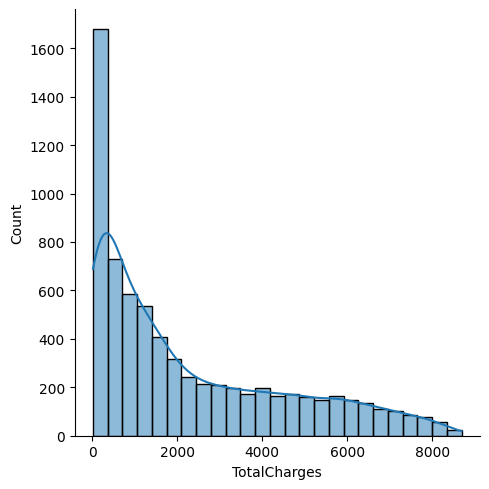

In [20]:
sns.displot(df["TotalCharges"], kde=True)

In [21]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [23]:
df["customerID"].dtype == "O"

True

In [24]:
# 데이터타입이 O(object)인 애들만 col_list에 넣었습니다.
col_list = []
for i in df.columns:
    if df[i].dtype == "O":
        col_list.append(i)

In [25]:
# 중복없이 유니크한 **값**들만 보여줘
df["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [28]:
# 유니크한 값들의 **갯수**를 보여줘
df["Contract"].nunique()

3

In [29]:
# col_list에서 하나씩 꺼내서, nunique 확인
for i in col_list:
    print(i, df[i].nunique())

customerID 7043
gender 2
Partner 2
Dependents 2
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
Churn 2


In [30]:
# CustomerID 칼럼 제거하기
# df = df.drop("customerID", axis=1)
df.drop("customerID", axis=1, inplace=True)

In [35]:
# col_list에서 0번인덱스인 customerID 제거
col_list = col_list[1:]

In [36]:
# 오브젝트 칼럼 카테고리화
df = pd.get_dummies(df, columns=col_list, drop_first=True)

In [37]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [39]:
df.isna().sum()

SeniorCitizen                             0
tenure                                    0
MonthlyCharges                            0
TotalCharges                             11
gender_Male                               0
Partner_Yes                               0
Dependents_Yes                            0
PhoneService_Yes                          0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service           0
StreamingTV_Yes                           0
StreamingMovies_No internet serv

In [40]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

In [41]:
df.isna().sum()

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMo

In [42]:
# 스케일 맞춰줘야 함 (스케일링)

# %pip install scikit-learn
from sklearn.preprocessing import MinMaxScaler

In [43]:
minmax = MinMaxScaler()

In [44]:
# 학습(어떻게 스케일링 해야 하는지 minmax가 학습)
minmax.fit(df)

MinMaxScaler()

In [45]:
# 실제 스케일링 작업 수행
# df -(스케일링)-> df_scaled

df_scaled = minmax.transform(df)

In [47]:
df_scaled[:5]

array([[0.        , 0.01388889, 0.11542289, 0.0012751 , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.        , 0.47222222, 0.38507463, 0.21586661, 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.        , 0.02777778, 0.35422886, 0.01031041, 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
      

In [48]:
type(df_scaled)

numpy.ndarray

In [49]:
# 넘파이 ndarray를 pd.DataFrame으로 변환해. 칼럼 이름은 df에서 그대로 가져다 써.
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [50]:
df_scaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0.0,0.013889,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.472222,0.385075,0.215867,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.027778,0.354229,0.010310,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.0,0.625000,0.239303,0.210241,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.027778,0.521891,0.015330,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [51]:
# 훈련 데이터와 테스트 데이터를 고르게 잘라내 주는 함수

from sklearn.model_selection import train_test_split

In [52]:
X = df_scaled.drop("Churn_Yes", axis=1)
y = df_scaled["Churn_Yes"]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [54]:
len(X_train)

4930

In [55]:
len(X_test)

2113

In [56]:
# KNN 모델을 만들어 훈련시켜보자.

from sklearn.neighbors import KNeighborsClassifier

In [57]:
knn = KNeighborsClassifier(5)

In [58]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [59]:
# 모델 평가
pred = knn.predict(X_test)

In [61]:
pred_result = pd.DataFrame({"실제":y_test, "예측":pred})

In [62]:
pred_result

,실제,예측
303,0.0,0.0
2150,0.0,1.0
4084,1.0,1.0
4476,1.0,1.0
2641,0.0,1.0
...,...,...
6610,0.0,1.0
7035,0.0,1.0
5670,1.0,0.0
2796,0.0,0.0


In [64]:
sum(pred_result["예측"] - pred_result["실제"] == 0)

1610

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [66]:
accuracy_score(y_test, pred)

0.7619498343587316

In [71]:
# 이웃 개수를 1~ 20까지 바꿔보면, 어느 게 가장 좋은가?
score = []
for i in range(1, 31):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    print(i, accuracy_score(y_test, pred))
    score.append(accuracy_score(y_test, pred))

1 0.7245622337908187
2 0.7477520113582584
3 0.7463322290582111
4 0.7671557027922385
5 0.7619498343587316
6 0.7737813535257927
7 0.7652626597255088
8 0.77520113582584
9 0.7742546142924751
10 0.7808802650260294
11 0.7733080927591103
12 0.7823000473260767
13 0.779460482725982
14 0.7851396119261713
15 0.7865593942262187
16 0.7879791765262659
17 0.7860861334595362
18 0.7946048272598202
19 0.7889256980596309
20 0.7950780880265026
21 0.791292001893043
22 0.7936583057264552
23 0.7889256980596309
24 0.7941315664931378
25 0.7917652626597255
26 0.7917652626597255
27 0.792238523426408
28 0.7903454803596782
29 0.7884524372929484
30 0.7936583057264552


<Axes: >

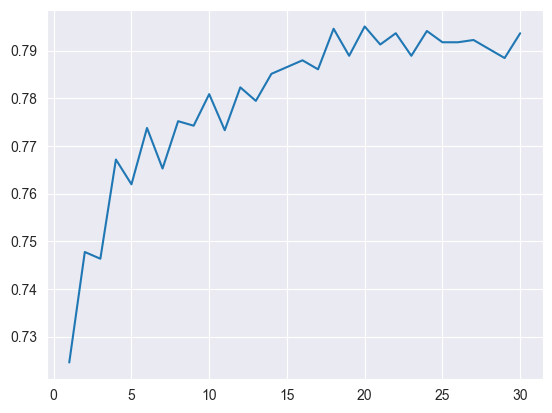

In [73]:
sns.lineplot(x=range(1,31), y=score)

In [74]:
knn

KNeighborsClassifier(n_neighbors=30)

In [84]:
import numpy as np
knn.predict(np.array(X_test.iloc[0]).reshape(1,30))

C:\Users\HKIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0.])

In [82]:
X_test.iloc[0]

SeniorCitizen                            0.000000
tenure                                   0.944444
MonthlyCharges                           0.418408
TotalCharges                             0.471982
gender_Male                              0.000000
Partner_Yes                              1.000000
Dependents_Yes                           1.000000
PhoneService_Yes                         0.000000
MultipleLines_No phone service           1.000000
MultipleLines_Yes                        0.000000
InternetService_Fiber optic              0.000000
InternetService_No                       0.000000
OnlineSecurity_No internet service       0.000000
OnlineSecurity_Yes                       0.000000
OnlineBackup_No internet service         0.000000
OnlineBackup_Yes                         1.000000
DeviceProtection_No internet service     0.000000
DeviceProtection_Yes                     1.000000
TechSupport_No internet service          0.000000
TechSupport_Yes                          1.000000
